# <center>Using SQLlite with Python</center>
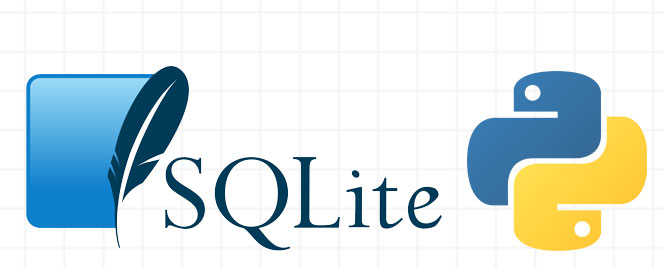

## Documentation at: https://docs.python.org/3/library/sqlite3.html

### https://www.dataquest.io/blog/python-pandas-databases

In [ ]:
import sqlite3

print(sqlite3.version)
print(sqlite3.sqlite_version)

### We just want an in memory database...

## 1) Connect to the database.  In Memory in this case.

In [ ]:
# dbconn = sqlite3.connect(':memory:')  # for a temporary database

In [ ]:
dbconn = sqlite3.connect('mydw') # permanent database

In [ ]:
print()

## 2) Create a cursor to use to execute SQL statements.

In [ ]:
cursor = dbconn.cursor()

In [ ]:
cursor

## 3) Use the cursor to execute SQL statements to the database.
Note:  We always execute a commit after the statement.

In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS books(id INTEGER PRIMARY KEY, 
                   title TEXT, author TEXT, price TEXT, year TEXT)
''')
dbconn.commit()

In [ ]:
cursor.execute('''INSERT INTO books values (1, 'Pro PowerShell', 'Bryan Cafferky', 35.00, 2015)
''')
cursor.execute('''INSERT INTO books values (2, "'Hithiker's Guide to the Galaxy", 'Douglas Adams', 12.00, 199)
''')
dbconn.commit()

In [ ]:
lstbooks = cursor.execute('''select * from books;''').fetchall()
print(lstbooks)

## Not very easy to read the output, what type is returned?

In [ ]:
type(lstbooks)

## Dataframes are much easier to work with so let's use a dataframe instead.

In [ ]:
import sqlite3
import pandas as pd

# convert query results to a dataframe
dfbook = pd.read_sql_query("SELECT * FROM books", dbconn)
dfbook.head()

In [ ]:
type(dfbook)

## We can drop the table since we are done.

In [ ]:
cursor = dbconn.cursor()
cursor.execute('''DROP TABLE books''')
dbconn.commit()

In [ ]:
booksdf = cursor.execute('''select * from books;''').fetchall()

# Save a dataframe to SQLite...

In [ ]:
custDF = pd.read_csv('.\data\dimcustomer.csv')  
custDF.head(2)

In [ ]:
custDF.columns 

In [ ]:
custDF.dtypes.head(3)

In [ ]:
# if_exists{‘fail’, ‘replace’, ‘append’}, default ‘fail’

custDF.to_sql('dimcustomer', con=dbconn, if_exists='replace')

In [ ]:
pd.read_sql_query('select * from dimcustomer limit 2',con=dbconn)

In [ ]:
cursor.close()
dbconn.close()

# Chinook, SQLite's Answer to AdventureWorks...

In [ ]:
ls

## Sample Database

http://www.sqlitetutorial.net/sqlite-sample-database/
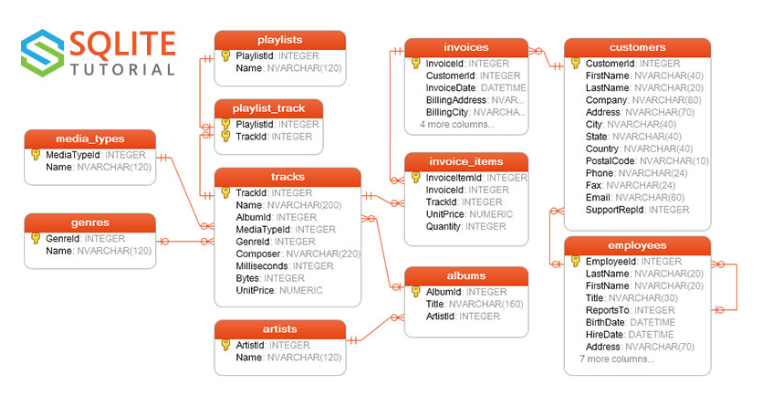

In [ ]:
conn = sqlite3.connect("chinook.db")
cur = conn.cursor()

albums = cur.execute("""select * from albums order by title limit 3;""").fetchall()
print(albums)

In [ ]:
type(albums)

In [ ]:
cur.execute("""select * from albums order by title limit 3;""").fetchone()

In [ ]:
albumdata = cur.execute("""select * from albums order by title limit 3;""").fetchmany(5)

In [ ]:
# Convert the list returned to a dataframe..

from pandas import DataFrame

DataFrame(albumdata)

In [ ]:
import sqlite3
import pandas as pd

# return query results as a dataframe

dfalbum = pd.read_sql_query("SELECT * FROM albums", conn)
dfalbum.head()

## SQLite has a database catalog

In [ ]:
pd.read_sql_query("select * from sqlite_master where type = 'table';", conn)

In [ ]:
pd.read_sql_query("select name from sqlite_master where type = 'index';", conn)

In [ ]:
dftablist = pd.read_sql_query("select name from sqlite_master where type = 'table';", conn)

In [ ]:
# Get table schema...

pd.read_sql_query("""
PRAGMA table_info('albums');
""", conn)

## Suppressing the default index...

In [ ]:
qry = '''
select substr(a.name, 1, 10) as Artist,
       substr(title,1, 15) as Album,
       t.name as Song
from albums r
join artists a
on (r.artistid = a.artistid)
join tracks t 
on (r.albumid = t.albumid)
order by a.name, title
limit 15;
'''

pd.read_sql_query(qry, conn, index_col = 'Artist')  # index_col replaces the default dataframe index

## Let's create a new table from a query 

In [ ]:
# Note the create table statment before the select query...

qry = '''
create table if not exists top15 as
select substr(a.name, 1, 10) as Artist,
       substr(title,1, 15) as Album,
       t.name as Song
from albums r
join artists a
on (r.artistid = a.artistid)
join tracks t 
on (r.albumid = t.albumid)
order by a.name, title
limit 15;
'''

albums = cur.execute(qry)

In [ ]:
pd.read_sql_query('select * from top15', conn)

## Let's create a new table from a dataframe

In [ ]:
best_acdcDF = pd.read_sql_query('select * from top15 where artist = "AC/DC"', conn)

### The works with full scale DBMSs like PostgreSQL too!

In [ ]:
best_acdcDF.to_sql('best_acdc', con=conn, if_exists='append')

In [ ]:
 pd.read_sql_query('select * from best_acdc', conn)

# Let's close the connection. 

In [ ]:
cur.close()
conn.close()

#  Connecting to PostgreSQL

In [ ]:
pip install -U psycopg2

# What about using a real database like PostgreSQL?

In [ ]:
import psycopg2 as pg
import pandas.io.sql as psql
 
# get connected to the database
connection = pg.connect("dbname=Development user=bryan password=bryan")
 
df = pd.read_sql_query('select * from person',con=connection)

In [ ]:
df

In [ ]:
conn.close()

#  However, this will not work with SQL Server.